In [19]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("StudentsPerformance.csv")

df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

X = df_encoded.drop("math score", axis=1)
y = df_encoded["math score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1).fit(X_train, y_train)
ridge_mse = mean_squared_error(y_test, ridge.predict(X_test))
ridge_r2 = r2_score(y_test, ridge.predict(X_test))

lasso = Lasso(alpha=0.01).fit(X_train, y_train)
lasso_mse = mean_squared_error(y_test, lasso.predict(X_test))
lasso_r2 = r2_score(y_test, lasso.predict(X_test))

print("\nRidge → MSE:", ridge_mse, "| R2:", ridge_r2)
print("Lasso → MSE:", lasso_mse, "| R2:", lasso_r2)



Ridge → MSE: 28.29701796299511 | R2: 0.8837133063955581
Lasso → MSE: 28.288332847733045 | R2: 0.8837489979068941


In [18]:
comparison = pd.DataFrame({
    "Model": ["Ridge", "Lasso"],
    "MSE": [ridge_mse, lasso_mse],
    "R2 Score": [ridge_r2, lasso_r2]
})
comparison

,Model,MSE,R2 Score
0,Ridge,28.297018,0.883713
1,Lasso,28.288333,0.883749


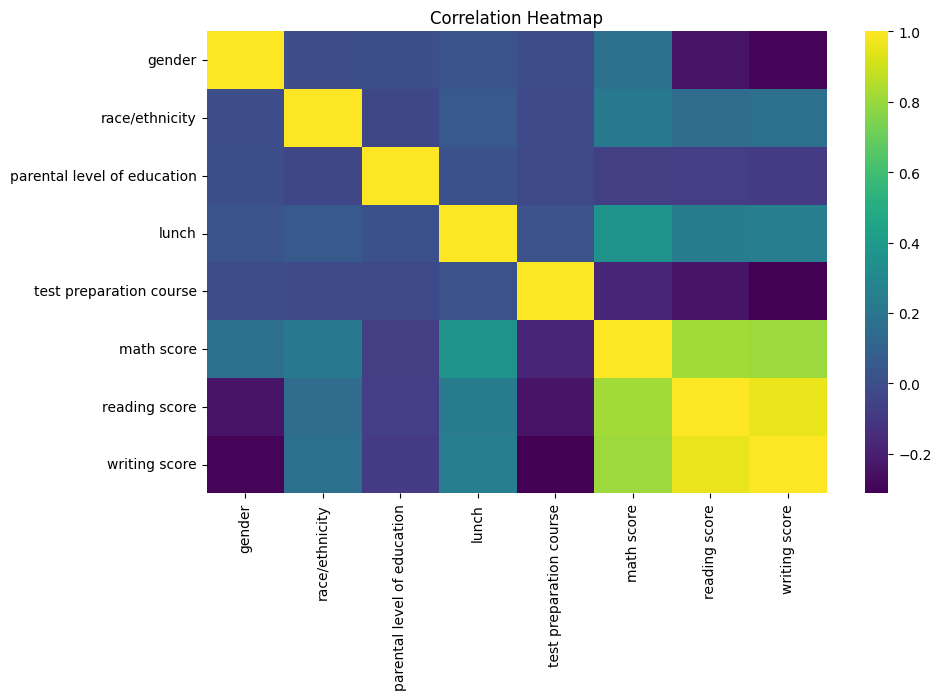

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=False, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()


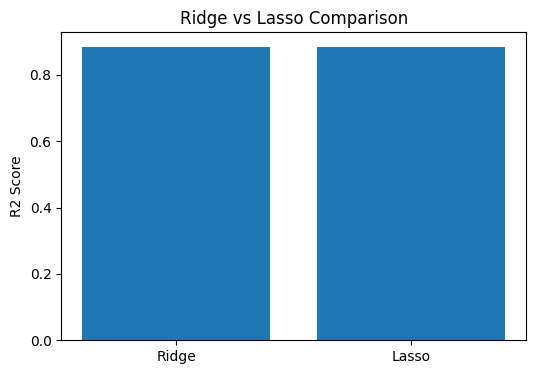

In [14]:
models = ["Ridge", "Lasso"]
r2_scores = [ridge_r2, lasso_r2]

plt.figure(figsize=(6,4))
plt.bar(models, r2_scores)
plt.ylabel("R2 Score")
plt.title("Ridge vs Lasso Comparison")
plt.show()
